In [1]:
using CSV, DataFrames, StatsPlots, HypothesisTests, Plots, Statistics

In [2]:
df = CSV.read("/Users/VSR/Desktop/Capstone/kmeans_dataset.csv", DataFrame)

Row,Feature1,Feature2,TrueLabels
,Float64,Float64,Int64
1,0.428577,4.974,0
2,1.61991,0.0676453,1
3,1.43289,4.37679,0
4,-1.57846,3.03446,2
5,-1.65863,2.26746,2
6,-1.52173,3.23408,2
7,0.836857,2.13636,1
8,0.241009,4.81041,0
9,-2.10321,2.44201,2


In [5]:
# Extract features from the DataFrame
features = Matrix(df[:, 1:2])  
true_labels = df[:, :TrueLabels] 

300-element Vector{Int64}:
 0
 1
 0
 2
 2
 2
 1
 0
 2
 2
 1
 1
 1
 ⋮
 1
 1
 2
 2
 2
 1
 0
 0
 2
 1
 0
 2

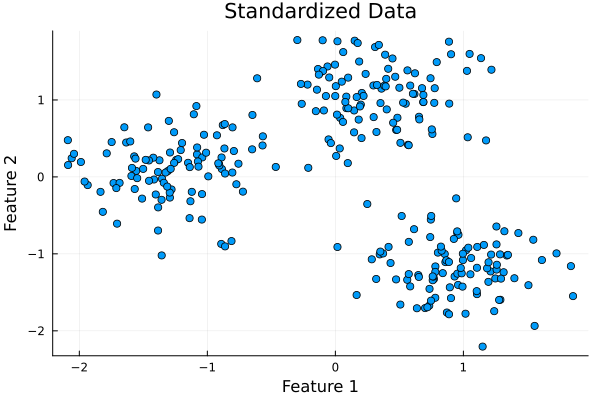

In [6]:
# Standardizing the features
features_standardized = (features .- mean(features, dims=1)) ./ std(features, dims=1)

# Visualize the standardized features
scatter(features_standardized[:, 1], features_standardized[:, 2], title="Standardized Data", xlabel="Feature 1", ylabel="Feature 2", legend=false)

In [8]:
using Pkg
Pkg.add("Clustering")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [aaaa29a8] + Clustering v0.15.7
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
Precompiling project...
  ? Metrics


In [14]:
using Clustering
# Perform K-Means clustering
k = 4  # Number of clusters
kmeans_result = kmeans(features_standardized', k; init=:rand)



KmeansResult{Matrix{Float64}, Float64, Int64}([-1.4958966315868312 0.9381742787721702 -0.9628119537320263 0.32316509455854636; -0.08034747425517723 -1.1833434120701636 0.34920967649160706 1.0746857399967555], [4, 2, 4, 3, 1, 3, 2, 4, 1, 3  …  1, 3, 3, 2, 4, 4, 3, 2, 4, 3], [0.25382733596701534, 0.2817025298822582, 0.08674373261140156, 0.09501040558010088, 0.07686589142841038, 0.06009770746651366, 1.1647532080988048, 0.273526781509728, 0.011026229078795247, 0.18874246816080453  …  0.07798418107892147, 0.10344169297912353, 0.09786071046249423, 0.9768696257933698, 0.05455553049054185, 0.3590219647071995, 0.11205251074176314, 0.21688047424615498, 0.19931500629102916, 0.6177945407823386], [56, 100, 44, 100], [56, 100, 44, 100], 72.18714294022801, 8, true)

In [15]:
# Extract the cluster assignments
y_kmeans = kmeans_result.assignments

# Extract the cluster centers
centers = kmeans_result.centers



2×4 Matrix{Float64}:
 -1.4959      0.938174  -0.962812  0.323165
 -0.0803475  -1.18334    0.34921   1.07469

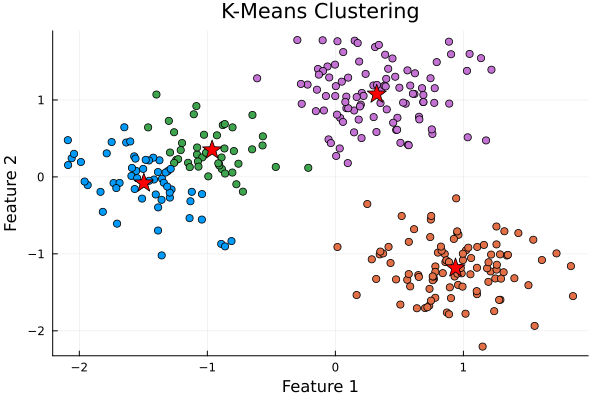

In [16]:
# Visualize the clustered data
scatter(features_standardized[:, 1], features_standardized[:, 2], c=y_kmeans, title="K-Means Clustering", xlabel="Feature 1", ylabel="Feature 2", legend=false)
scatter!(centers[1, :], centers[2, :], c=:red, marker=:star, markersize=10, label="Centroids")

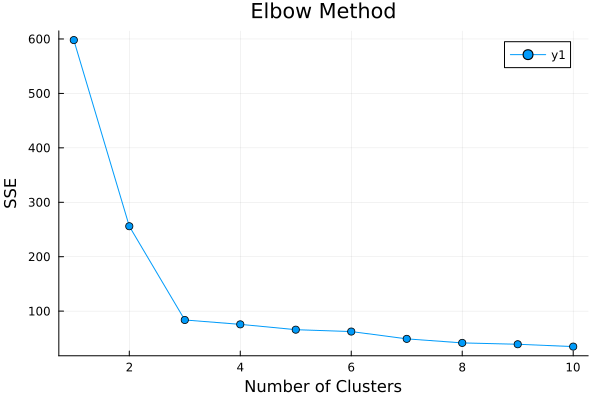

In [13]:
# Elbow method to find optimal number of clusters
sse = []
k_range = 1:10

for k in k_range
    kmeans_result = kmeans(features_standardized', k; init=:rand)
    
    # Calculate sum of squared distances (SSE) for the current k
    total_sse = 0.0
    for i in 1:k
        cluster_points = features_standardized[kmeans_result.assignments .== i, :]
        centroid = kmeans_result.centers[:, i]
        total_sse += sum(sum((cluster_points .- centroid').^2, dims=2))
    end
    push!(sse, total_sse)
end

# Plot the elbow curve
plot(k_range, sse, title="Elbow Method", xlabel="Number of Clusters", ylabel="SSE", marker=:circle)